# SC1015 Mini Project

**Problem Formulation:** *probably need to include a brief summary of project here *

**Dataset Used:** [Sleep Health and Lifestyle Dataset from Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data)

**Dataset Columns:**
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

---
## Table of Contents
1. [Data Preparation and Cleaning](#dataprep)
2. [Exploratory Data Analysis](#EDA)
3. [Machine Learning](#RF1)

In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers

In [3]:
# Import dataset
data = pd.read_csv('C:\\Users\\rache\\OneDrive\\Y1S2\\SC1015\\Sleep_health_and_lifestyle_dataset.csv')
_data = pd.DataFrame(data)

---
## Data Preparation and Cleaning <a name="dataprep"></a>

### 1. Dataset Overview

In [4]:
_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
_data.shape

(374, 13)

In [6]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### 2. Data Cleaning
**Null value check and removal (if needed)**

In [7]:
# Check for NA and missing values 
has_na = _data.isna().any().any()

if has_na:
    print("The dataframe contains NA values.")
else:
    print("The dataframe does not contain NA values. No null value cleaning needed.")

The dataframe contains NA values.


In [8]:
sleep_data = _data.fillna('NO')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NO
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Duplicate Check and removal (if needed)**

In [9]:
# Check for duplicates in dataframe
duplicate_rows = sleep_data[sleep_data.duplicated()]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                0 non-null      int64  
 1   Gender                   0 non-null      object 
 2   Age                      0 non-null      int64  
 3   Occupation               0 non-null      object 
 4   Sleep Duration           0 non-null      float64
 5   Quality of Sleep         0 non-null      int64  
 6   Physical Activity Level  0 non-null      int64  
 7   Stress Level             0 non-null      int64  
 8   BMI Category             0 non-null      object 
 9   Blood Pressure           0 non-null      object 
 10  Heart Rate               0 non-null      int64  
 11  Daily Steps              0 non-null      int64  
 12  Sleep Disorder           0 non-null      object 
dtypes: float64(1), int64(7), object(5)
memory usage: 0.0+ bytes


**Removing irrelevant columns**

In [10]:
# Removing irrelevant columns
sleep_data = sleep_data.drop('Person ID', axis = 1)
sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NO
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Categorical Variable cleaning**

In [11]:
# Check if any categorical variables need cleaning
categorical_columns = sleep_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = sleep_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Gender: ['Male' 'Female']
Unique values in Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Unique values in Sleep Disorder: ['NO' 'Sleep Apnea' 'Insomnia']


**Cleaning 'Occupation' column**

In [12]:
sleep_data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Our team considered the following aspects regarding the occupation column:
- 'Sales Representative' is merged with 'Salesperson' as they are from similar categories and grouping them would improve statistical power and ensure consistency
- 'Software Engineer' is merged with 'Engineer' for the same reasons as above
- 'Scientist' and 'Manager' to be removed from the dataframe as it is too poorly represented in the dataset to show significant analysis

In [13]:
# Merging 'Sales Representative' with 'Salesperson'
sleep_data["Occupation"] = sleep_data["Occupation"].replace({'Sales Representative': 'Salesperson'})
# Merging 'Software Engineer' with 'Engineer' 
sleep_data["Occupation"] = sleep_data["Occupation"].replace({'Software Engineer': 'Engineer'})
# Removing 'Scientist' and 'Manager'
drop = sleep_data[sleep_data['Occupation'].isin(['Manager', 'Scientist'])].index
sleep_data = sleep_data.drop(drop)

sleep_data['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       67
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Name: count, dtype: int64

In [14]:
sleep_data.shape

(369, 12)

**Cleaning 'BMI Category' column**

In [15]:
sleep_data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       143
Normal Weight     21
Obese             10
Name: count, dtype: int64

'Normal Weight' and 'Normal' have the same meaning but different naming convention. We will rename 'Normal Weight' to 'Normal' for standardisation.

In [16]:
sleep_data['BMI Category'] = sleep_data['BMI Category'].replace({'Normal Weight': 'Normal'})
sleep_data['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    143
Obese          10
Name: count, dtype: int64

**Splitting 'Blood Pressure' column**

As mentioned in the dataset column description, blood pressure is recorded as systolic pressure over diastolic pressure hence we will create two new columns to store them. These two values will then help us categorise each individual to a unique blood pressure category.
- Systolic pressure: amount of pressure experienced by the arteries while the heart is beating
- Diastolic pressure: amount of pressure in the arteries while the heart is resting in between heartbeats

In [17]:
# Split by '/'
sleep_data[['Systolic Pressure', 'Diastolic Pressure']] = sleep_data['Blood Pressure'].str.split('/', expand=True)
# Convert from string to numeric using .to_numeric
sleep_data['Systolic Pressure'] = pd.to_numeric(sleep_data['Systolic Pressure'])
sleep_data['Diastolic Pressure'] = pd.to_numeric(sleep_data['Diastolic Pressure'])
sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NO,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO,125,80
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [18]:
sleep_data.shape

(369, 14)

**Grouping Blood Pressure into categories**

Following the guidelines provided by HealthHub, individuals are categorised based on their blood pressure levels using systolic and diastolic pressure.

![BP Table](blood_pressure_table.png)

Refer to this [HealthHub article link](https://www.healthhub.sg/a-z/diseases-and-conditions/understanding-blood-pressure-readings) to find the table above.


In [19]:
# Creating the Blood Pressure Category column
blood_pressure_conditions = [
    (sleep_data['Systolic Pressure'] < 120) & (sleep_data['Diastolic Pressure'] < 80), # Normal
    (sleep_data['Systolic Pressure'].between(120, 140)) & (sleep_data['Diastolic Pressure'] < 90), # High-Normal
    (sleep_data['Systolic Pressure'] >= 140) & (sleep_data['Diastolic Pressure'] >= 90) | (sleep_data['Diastolic Pressure'] >= 80) # Hypertension
]

labels = ['Normal', 'High-Normal', 'Hypertension']

sleep_data['Blood Pressure Category'] = np.select(blood_pressure_conditions, labels, default='Undefined')
sleep_data['Blood Pressure Category'].value_counts()

Blood Pressure Category
High-Normal     228
Hypertension    100
Normal           41
Name: count, dtype: int64

**Final version of cleaned dataframe**

In [20]:
sleep_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NO,126,83,High-Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO,125,80,High-Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NO,125,80,High-Normal
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension


In [21]:
sleep_data.shape

(369, 15)

In [22]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    object 
 1   Age                      369 non-null    int64  
 2   Occupation               369 non-null    object 
 3   Sleep Duration           369 non-null    float64
 4   Quality of Sleep         369 non-null    int64  
 5   Physical Activity Level  369 non-null    int64  
 6   Stress Level             369 non-null    int64  
 7   BMI Category             369 non-null    object 
 8   Blood Pressure           369 non-null    object 
 9   Heart Rate               369 non-null    int64  
 10  Daily Steps              369 non-null    int64  
 11  Sleep Disorder           369 non-null    object 
 12  Systolic Pressure        369 non-null    int64  
 13  Diastolic Pressure       369 non-null    int64  
 14  Blood Pressure Category  369 no

### 3. Data Preparation
In our project, we will be working with two dataframes.
1. **sleep_data** : Contains original data to conduct Exploratory Data Analysis
2. **data_ohe** : Contains the one hot encoding format for the original dataframe (sleep_data). The purpose of this is to convert categorical variables into a numerical format so that out machine learning algorithm (Random Forest Algorithm) can understand and process it.
---
This section focuses on preparing data_ohe dataframe.

In [23]:
# Change the categories under Sleep Disorder into numerical format
temp_df = sleep_data.copy()
#temp_df['Sleep Disorder'].unique()

In [24]:
temp_df['Sleep Disorder'] = np.where(temp_df['Sleep Disorder'] == 'NO', 0,
np.where(temp_df['Sleep Disorder'] == 'Sleep Apnea', 1,
np.where(temp_df['Sleep Disorder'] == 'Insomnia', 2,-1)))



In [25]:
temp_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0,126,83,High-Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,High-Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0,125,80,High-Normal
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,1,140,90,Hypertension
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,1,140,90,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension


In [26]:
temp_df.info()
# Sleep Disorder is now an integer column

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    object 
 1   Age                      369 non-null    int64  
 2   Occupation               369 non-null    object 
 3   Sleep Duration           369 non-null    float64
 4   Quality of Sleep         369 non-null    int64  
 5   Physical Activity Level  369 non-null    int64  
 6   Stress Level             369 non-null    int64  
 7   BMI Category             369 non-null    object 
 8   Blood Pressure           369 non-null    object 
 9   Heart Rate               369 non-null    int64  
 10  Daily Steps              369 non-null    int64  
 11  Sleep Disorder           369 non-null    int32  
 12  Systolic Pressure        369 non-null    int64  
 13  Diastolic Pressure       369 non-null    int64  
 14  Blood Pressure Category  369 no

In [27]:
# # One hot encoding of remaining categorical variables (Gender, Occupation, BMI category, Blood Pressure)
# ohe = OneHotEncoder()

# # Store categorical columns into temporary dataframe and fit ohe model
# cat= temp_df[['Gender','Occupation','BMI Category','Blood Pressure']]
# ohe.fit(cat)

# # Store ohe transformation into new dataframe cat_ohe
# cat_ohe = pd.DataFrame(ohe.transform(cat).toarray(), columns=ohe.get_feature_names_out(cat.columns))
# cat_ohe.info()

In [28]:
# Combining Numeric features with the OHE Categorical features
#num = temp_df[['Age', 'Sleep Duration','Quality of Sleep','Physical Activity Level','Heart Rate', 'Daily Steps','Stress Level']]
#res = temp_df['Sleep Disorder']
#data_ohe = pd.concat([num, cat_ohe,res], sort = False, axis = 1).reindex(index=num.index)

# Check the final dataframe
#data_ohe.info()

In [29]:
#data_ohe.head()

---
## Exploratory Data Analysis <a name="EDA"></a>

In [30]:
# Basic statistical values for numerical variables
sleep_data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,42.271003,7.144986,7.338753,59.379404,5.368564,70.062331,6836.314363,128.552846,84.647696
std,8.682957,0.791829,1.175677,20.862834,1.775341,4.054508,1620.028673,7.796184,6.200938
min,27.000000,5.900000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,36.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [31]:
#Basic statistical values for categorical variables
sleep_data.describe(include = 'O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Blood Pressure Category
count,369,369,369,369,369,369
unique,2,7,3,24,3,3
top,Male,Nurse,Normal,130/85,NO,High-Normal
freq,189,73,216,99,216,228


### 1. Univariate Analysis
Understanding the data by plotting all its variables

**Draw distributions of all numerical variables**

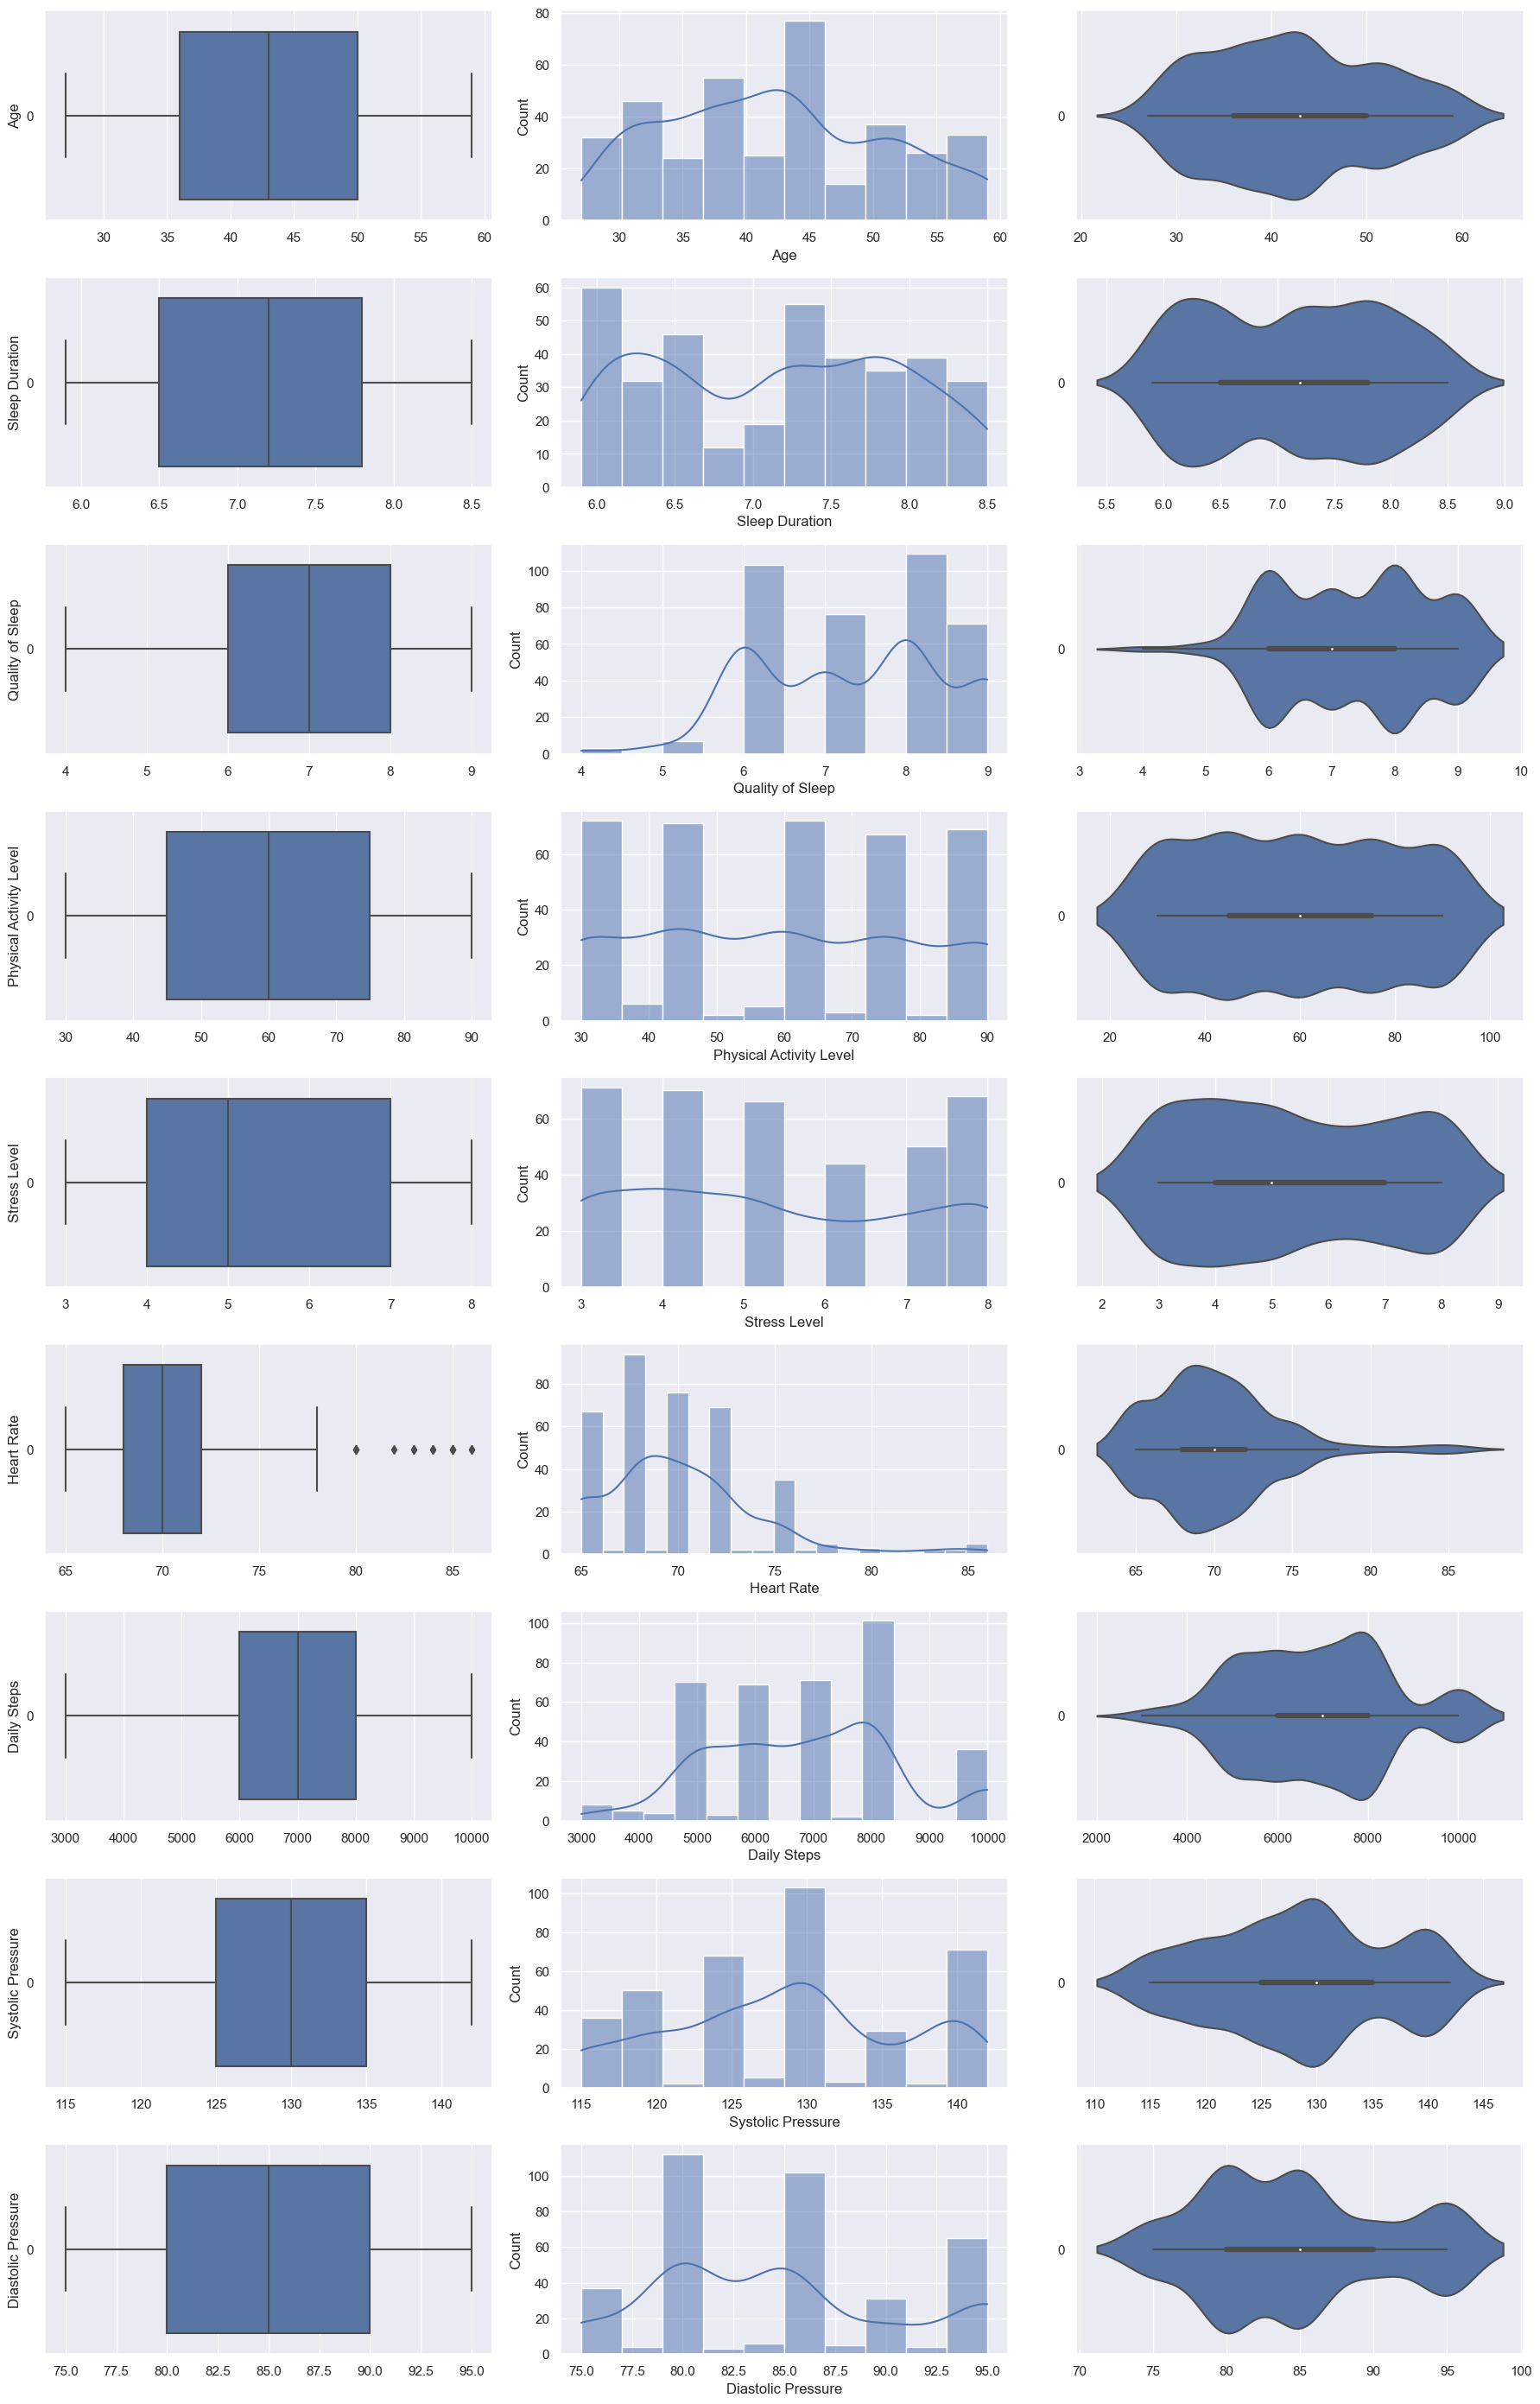

In [32]:
numeric_data = pd.DataFrame(sleep_data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']])

f, axes = plt.subplots(9, 3, figsize=(18, 28))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1], kde = True)
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    axes[count, 0].set_ylabel(f'{var}') # Set label
    count += 1
    
# Adjust layout and display plot
plt.tight_layout()
plt.show()

Insights into dataset based on visualisation and statistics shown above:
- Age ranges from 27 (min) to 59 (max) with median of 43 hence our guideline for categorising blood pressure (aged 18 years and older) is a valid guideline
- Quality of sleep is left-skewed (negative skew) which means majority of individuals in our data has better quality of sleep
- Stress level is right skewed (positive skew) as the median is closer to the bottom which means most individuals are not leading a very stressful life
- Heart rate seems to be skewed towards the right end suggesting there are more individuals with lower heart rates. There are also several outliers which are greater than 80 but less than 100. These outliers may be natural extremes as they are within conceivable ranges for humans hence it will be ignored
- Looking at the other numerical variables, there is not much of a pattern to be observed as they are quite balanced

**Distribution of Sleep Disorder (categorical)**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


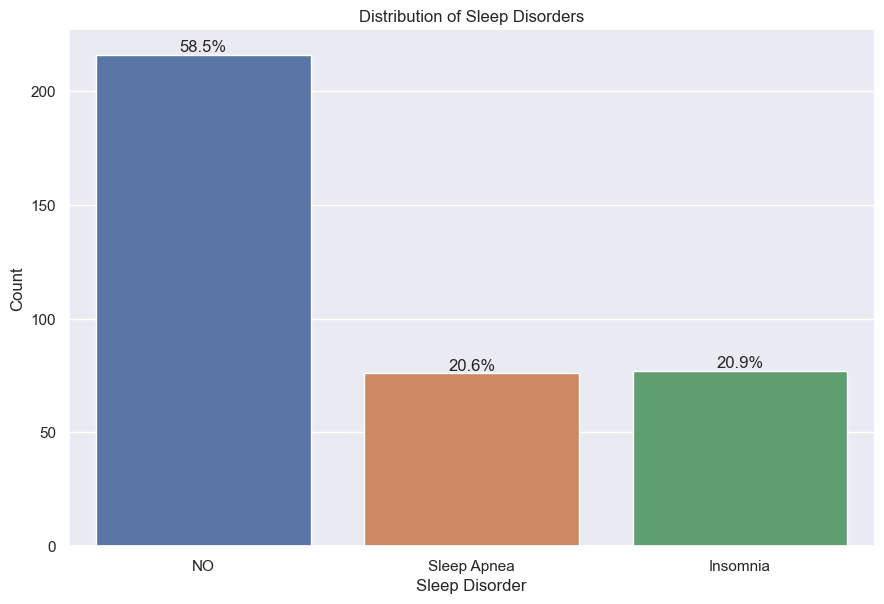

In [33]:
catplot = sb.catplot(x = "Sleep Disorder", data = sleep_data, kind = "count", height = 6, aspect = 1.5)

# Access the Axes object
ax = catplot.axes[0][0]

# Calculate percentages for each category
total_count = len(sleep_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom')

# Set labels and title
plt.ylabel('Count')
plt.title('Distribution of Sleep Disorders')

# Show the plot
plt.show()

Insight: The ratio of not having a sleep disorder to having one is 58.5% to 41.5% which makes this problem statement worth pursuing as it will help us find out what variables affect the presence of sleep disorders

**Distribution of Gender, Occupation, BMI Category, Blood Pressure Category (categorical)**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


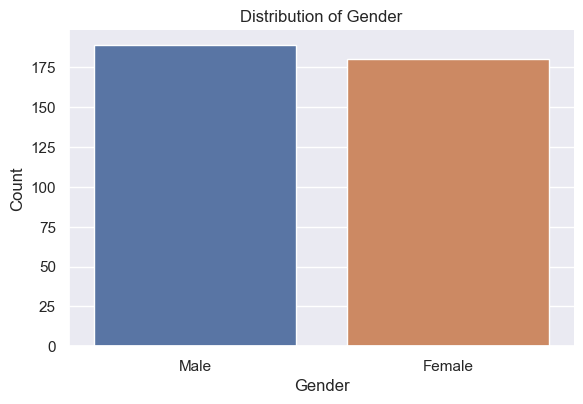

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


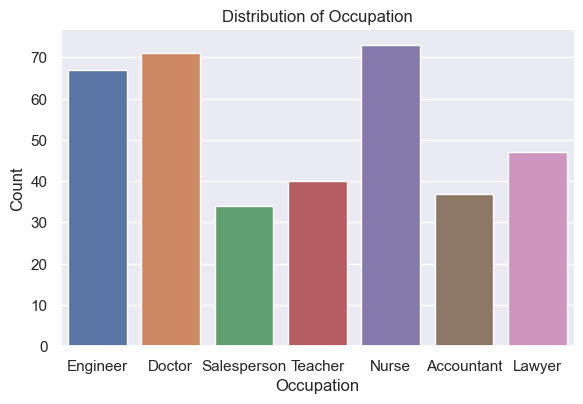

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


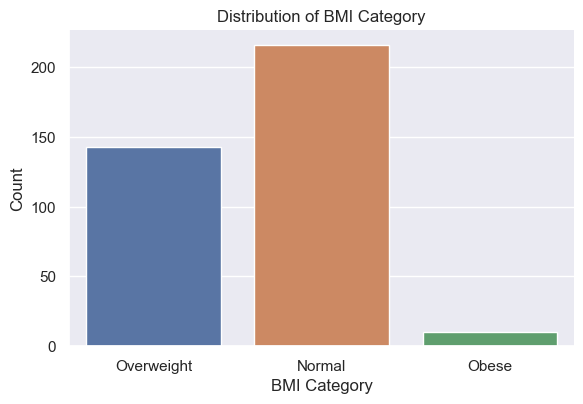

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


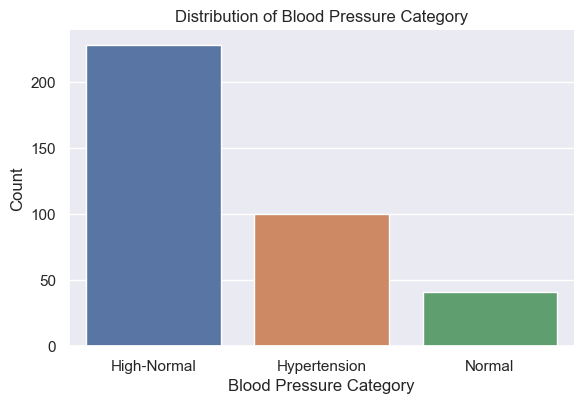

In [34]:
categorical_vars = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category']

for var in categorical_vars:
    sb.catplot(data = sleep_data, x = var, kind = 'count', height = 4, aspect = 1.5)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var}')
    plt.show()

Insights:
- Number of female and male is almost equal within this dataset
- Nurses, doctors and engineers form the majority within this dataset
- Majority of individuals have normal BMI which relates with the distribution of 'None' sleep disorder, suggesting a relationship between these two variables. Further analysis is needed.
- Majority of individuals have normal to high-normal blood pressure

### 2. Multivariate Analysis
Understanding relationship between every variable with sleep disorders

**Age vs Sleep Disorders**

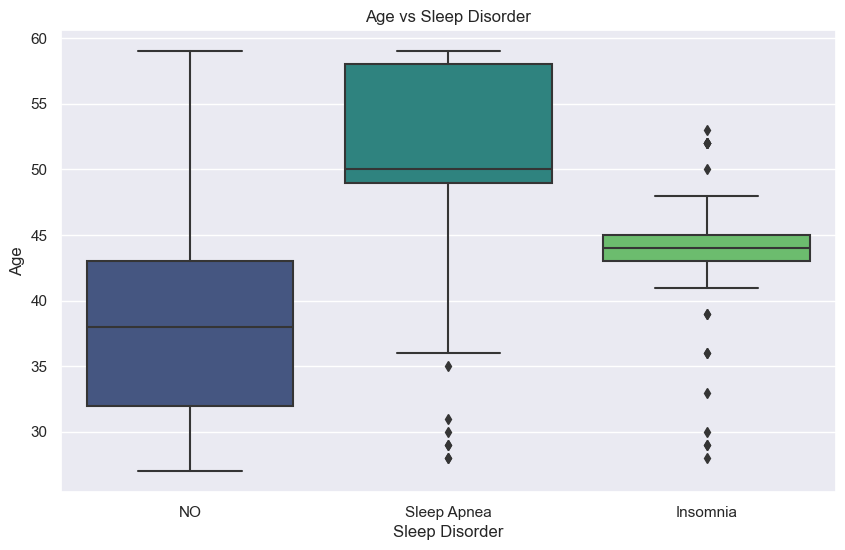

In [35]:
plt.figure(figsize = (10,6))
sb.boxplot(x = sleep_data['Sleep Disorder'], y = sleep_data['Age'], palette = 'viridis')
plt.title('Age vs Sleep Disorder')
plt.show()

Insights:
- Individuals aged 32 to 43, with a focus around 37 years (median age), are less likely to experience sleep apnea or insomnia.
- Sleep apnea becomes more prevalent among individuals aged 48 and above, as indicated by the interquartile range (IQR) and a median age of 50 years. Although there are outliers below 35 years, their impact on our prediction should be negligible.
- Insomnia is more common in the age range of 43 to 45. Despite the presence of 9 outliers, their influence on our analysis is likely minimal.
- The noticeable difference in median range of sleep disorders across age groups suggests that age may play a role in predicting or influencing the prevalence of sleep disorders.

**Sleep Duration vs Sleep Disorder**

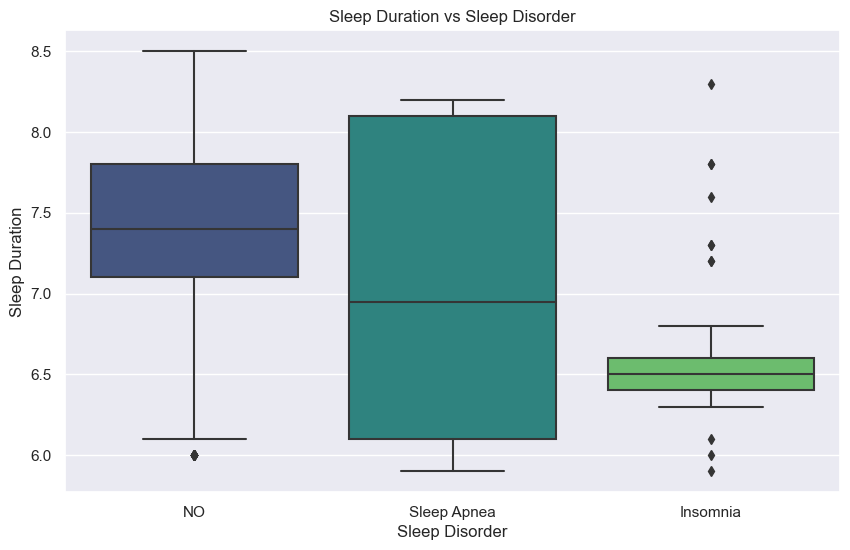

In [36]:
plt.figure(figsize = (10,6))
sb.boxplot(x = sleep_data['Sleep Disorder'], y = sleep_data['Sleep Duration'], palette = 'viridis')
plt.title('Sleep Duration vs Sleep Disorder')
plt.show()

Insights:
- Individuals without sleep disorders typically sleep for about 7.1 to 7.8 hours, aligning with the recommended sleep duration for adults.
- The range of sleep duration among individuals with sleep apnea is spread out as indicated by the length of the interquartile range (IQR) box. This variability may stem from frequent awakenings during sleep, potentially leading to inaccuracies in calculating total sleep duration.
- Individuals with insomnia typically sleep less than 7 hours. Additionally, there are 4 outliers with longer sleep durations which is likely due to fragmented sleep patterns where individuals experience multiple short sleep sessions.
- From the median, it is observed that sleep apnea and insomnia are below 7 hours which can indicate a negative correlation. As sleep duration decreases, prevalance of sleep disorder increases. Further analysis will be required to confirm this fact.

**Quality of Sleep vs Sleep Disorder**

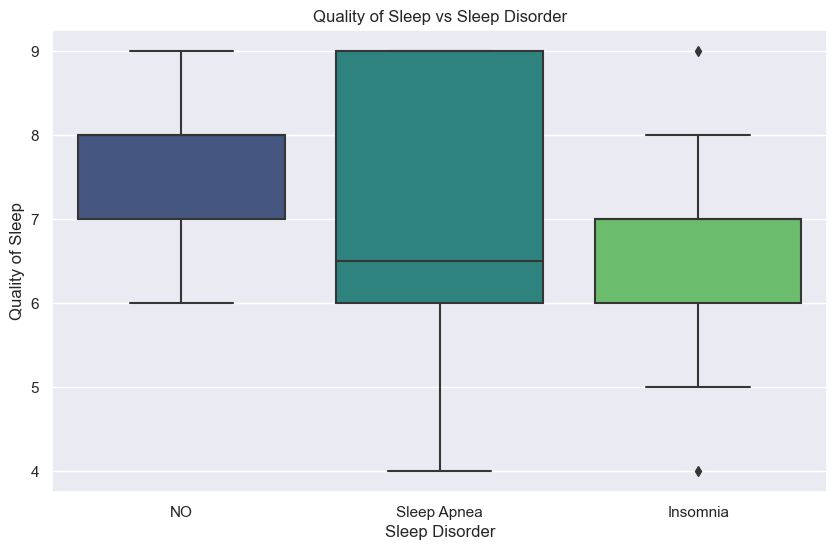

In [37]:
plt.figure(figsize = (10,6))
sb.boxplot(x = sleep_data['Sleep Disorder'], y = sleep_data['Quality of Sleep'], palette = 'viridis')
plt.title('Quality of Sleep vs Sleep Disorder')
plt.show()

Insights:
- Quality of sleep for individuals with sleep apnea is spread out between 6 to 9 while 'None' ranges from 7 to 8 and insomnia ranges from 6 to 7.
- There is no median line in the boxplot for 'None' and 'Insomnia'. It suggests that the median value falls outside the range of the box which can be caused by factors such as skewed data distribution.
- Since there is no median line, it is hard to say if this variable will be a good or bad predictor.

**Physical Activity Level vs Sleep Disorders**

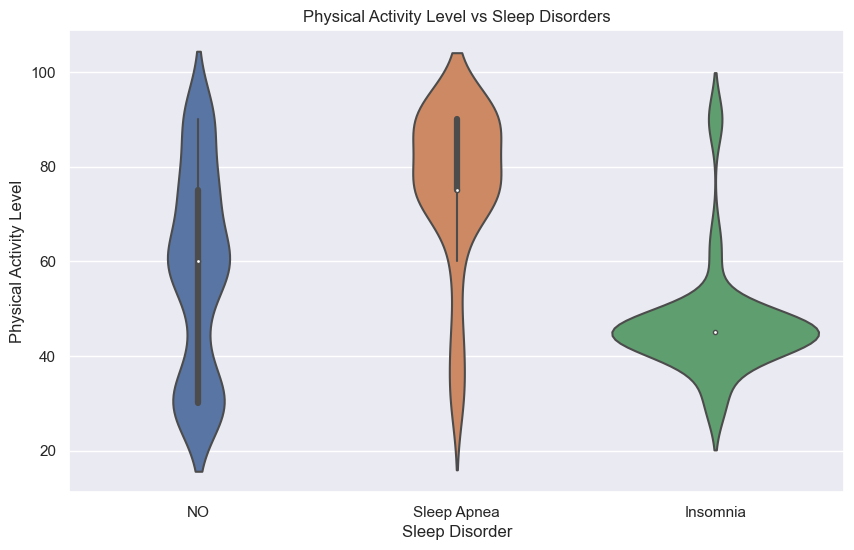

In [38]:
plt.figure(figsize = (10,6))
sb.violinplot(data = sleep_data, x = sleep_data["Sleep Disorder"], y = sleep_data['Physical Activity Level'])
plt.title("Physical Activity Level vs Sleep Disorders")
plt.show()

Insights:
- Individuals with no sleep disorders have a spread out distribution of physical activity
- The distribution of physical activity for individuals with sleep apnea concentrates at higher values (70 and above)
- The distribution of physical activity for individuals with insomnia concentrates at lower values (around 35 to 50). There is no IQR box to be seen. This can occur when data points are evenly distributed across the entire range without clear clustering or outliers. The tail of the violin plot is also thin and long towards the upperside of the plot which suggests that there are a few outliers there.
- The absence of IQR box makes it hard to identify whether it will be a good or bad predictor

**Stress Level vs Sleep Disorders**

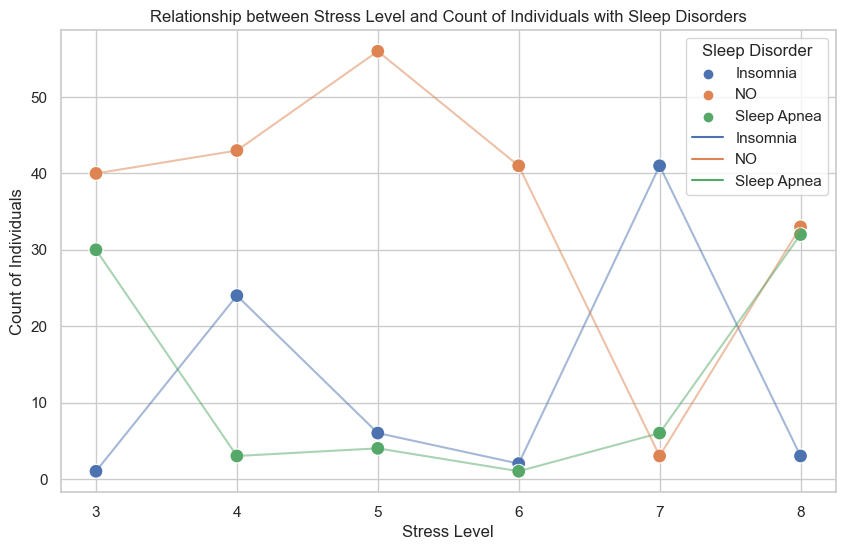

In [39]:
# Calculate the count of individuals for each sleep disorder category and stress level
count_data = sleep_data.groupby(['Sleep Disorder', 'Stress Level']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Stress Level', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Stress Level', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Stress Level and Count of Individuals with Sleep Disorders')
plt.xlabel('Stress Level')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()

Insights:
- As stress level increases, the numbers of individuals in the insomnia and sleep apnea groups slightly increases.However, we cannot make a direct cause-and-effect interpretation because at a lower level of stress (Level 3 stress), the number of individuals in the sleep apnea group is in the second position, while at Level 4 stress, insomnia is in the second position and close to the number of individuals in the none group. As the level increases, there is no linear correlation that we can establish hence this variable might not be a good predictor.

**Heart Rate vs Sleep Disorders**

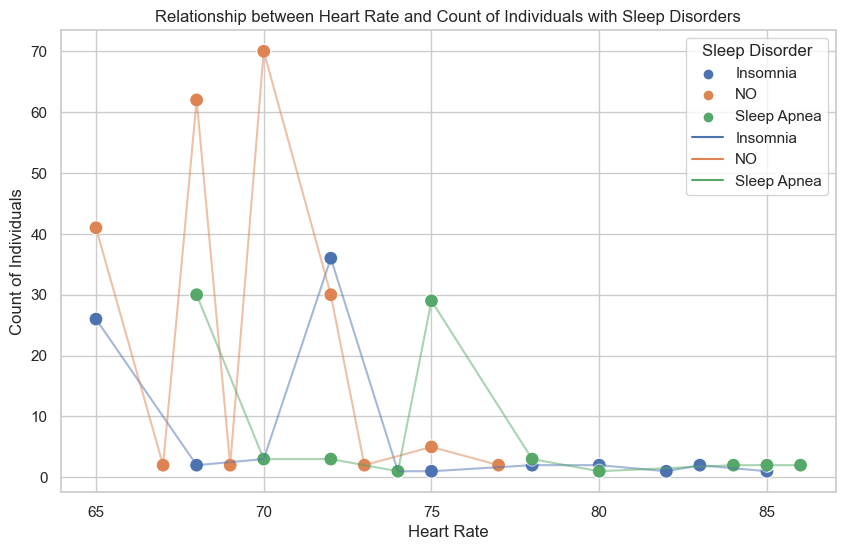

In [40]:
# Calculate the count of individuals for each sleep disorder category and heart rate
count_data = sleep_data.groupby(['Sleep Disorder', 'Heart Rate']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Heart Rate', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Heart Rate', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Heart Rate and Count of Individuals with Sleep Disorders')
plt.xlabel('Heart Rate')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()

Insights:
- According to this [article](https://amerisleep.com/blog/what-is-a-normal-sleeping-heart-rate/), the average sleeping heart rate for a normal healthy adult typically falls between 50-70 bpm, with potentially lower rates for athletes or physically active individuals.
- This suggests that individuals with heart rates within this average range are more likely to not have any sleep disorders.
- However, individuals with heart rates of 77 bpm and above may show signs of suffering from sleep apnea and insomnia. It's worth noting that the count of such individuals is relatively low, indicating that the correlation between heart rate and sleep disorders may not be significant in this dataset.

**Daily Steps vs Sleep Disorders**

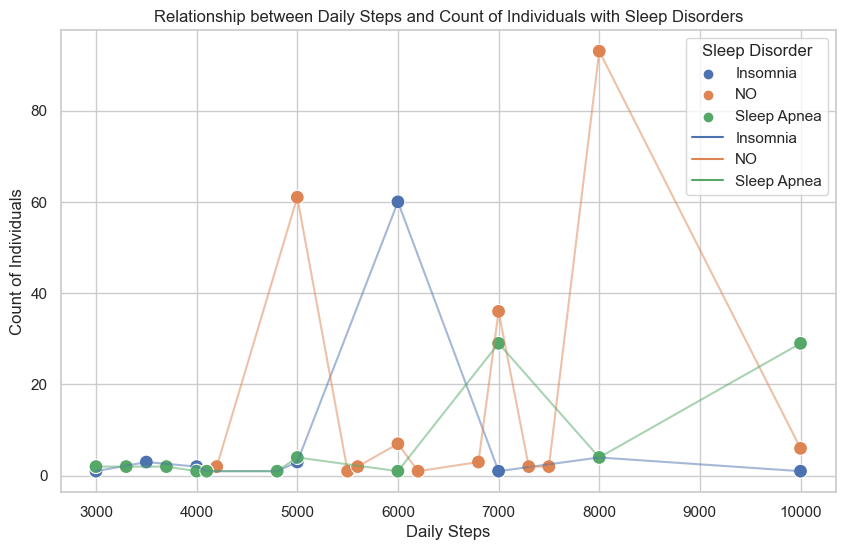

In [41]:
# Calculate the count of individuals for each sleep disorder category and heart rate
count_data = sleep_data.groupby(['Sleep Disorder', 'Daily Steps']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Daily Steps', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Daily Steps', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Daily Steps and Count of Individuals with Sleep Disorders')
plt.xlabel('Daily Steps')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()

Insights:
- There is a positive correlation between the number of daily steps and the absence of sleep disorders, indicating that physical activity during the day may contribute to better sleep health.
- However, while individuals with sleep apnea and insomnia generally reported lower daily step counts, there are notable anomalies. For instance, there are 60 individuals with insomnia who took 6000 steps daily and 30 individuals with sleep apnea who took 10000 daily steps.
- The anomalies suggest that daily steps alone may not be a definitive predictor of sleep disorders. While higher daily step counts are generally associated with better sleep health, exceptions exist where individuals with sleep disorders engage in significant physical activity.

**Gender vs Sleep Disorder**

Text(0.5, 1.0, 'Relationship between Gender and Sleep Disorder')

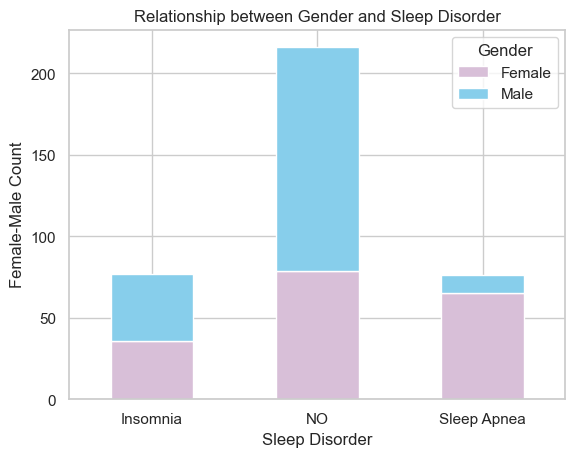

In [42]:
# Calculate number of males and females for each sleep disorder or None
gender_counts = sleep_data.groupby(['Sleep Disorder', 'Gender']).size().unstack(fill_value=0)

# Stacked bar chart
gender_counts.plot(kind='bar', stacked=True, color=['thistle', 'skyblue'])
# Customise chart
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=360)
plt.ylabel('Female-Male Count')
plt.title('Relationship between Gender and Sleep Disorder')

Insights:
- Among normal individuals, male outnumber females
- Women outnumber men when it comes to sleep apnea
- Men outnumber women when it comes to insomnia
- Females tend to suffer from sleep disorder when compared to males
- Based on the insights above, gender shows some correlation with different sleep disorders. However, whether gender alone would be a good predictor for sleep disorders depends on various factors.

**Occupation vs Sleep Disorder**

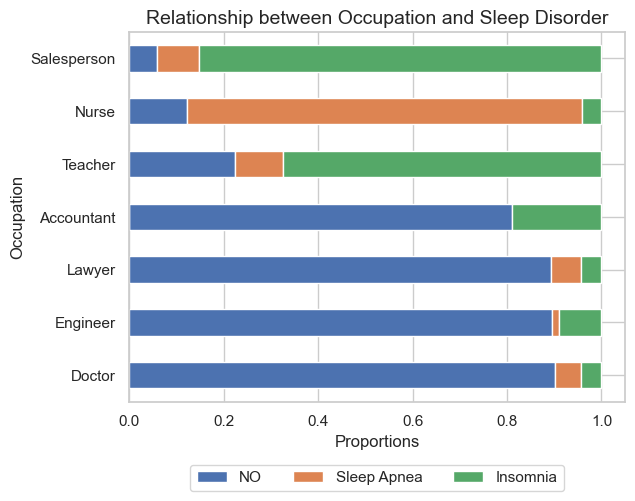

In [43]:
# Group data by 'Occupation' and 'Sleep Disorder'
df = sleep_data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack().sort_values(by='NO', ascending=False)
sleep_disorder = ['NO', 'Sleep Apnea', 'Insomnia']

df[sleep_disorder].plot(kind='barh',stacked=True)
plt.title('Relationship between Occupation and Sleep Disorder', fontsize=14)
plt.xlabel('Proportions', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3) # Specify legend location

Insights:
- Among normal individuals, doctors are in the majority.
- Salespersons and teachers exhibit a significant prevalence of insomnia within the dataset.
- Significant portion of nurses also suffers from sleep apnea compared to other occupations. This insight hints at potential occupational factors or working conditions unique to nursing that may have caused this high prevalence.
- Majority of other occupations show lower prevalence of sleep disorders which coincides with the prevalence of the 'None' category.
- Ultimately, this suggests that occupation has a significant impact on the presence of sleep disorders. It may not be as prevalent across all occupations and there is variability in sleep health among different occupations.

**BMI Category vs Sleep Disorder**

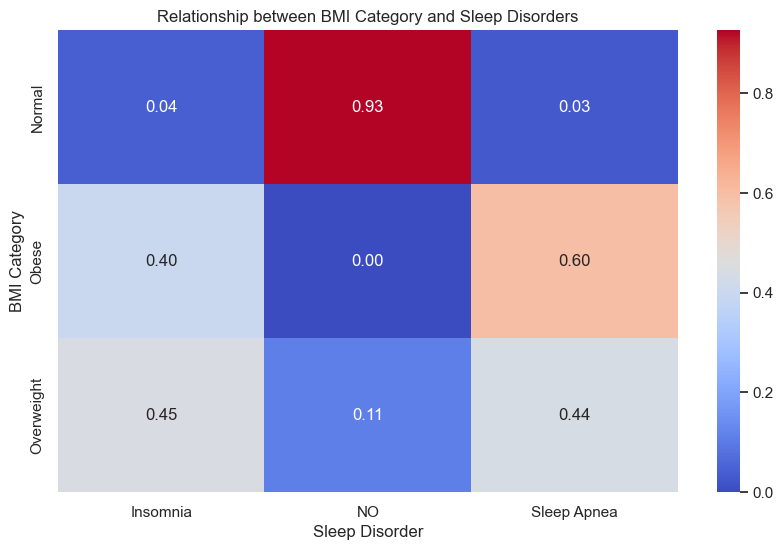

Values of the Heatmap:
[[0.04166667 0.92592593 0.03240741]
 [0.4        0.         0.6       ]
 [0.44755245 0.11188811 0.44055944]]


In [44]:
# Create cross-tabulation of BMI Category vs Sleep Disorder
crosstab_data = pd.crosstab(sleep_data['BMI Category'], sleep_data['Sleep Disorder'], normalize='index')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(crosstab_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Relationship between BMI Category and Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('BMI Category')
plt.show()

print("Values of the Heatmap:")
print(crosstab_data.values)

Insights:
- Individuals with Normal BMI are less likely to suffer from sleep disorders
- Individuals under the Overweight category have almost a 50% chance to suffer from insomnia or sleep apnea
- All obese individuals have either insomnia or sleep apnea
- Based on the insights, BMI categories show clear trends and correlations with sleep disorders hence it has high potential to be a good predictor. Normal BMI is associated with lower risk, overweight category with moderate risk, and obese category with high risk of sleep disorders.

**Blood Pressure Category vs Sleep Disorders**

Text(0.5, 1.0, 'Relationship between Blood Pressure Category and Sleep Disorders')

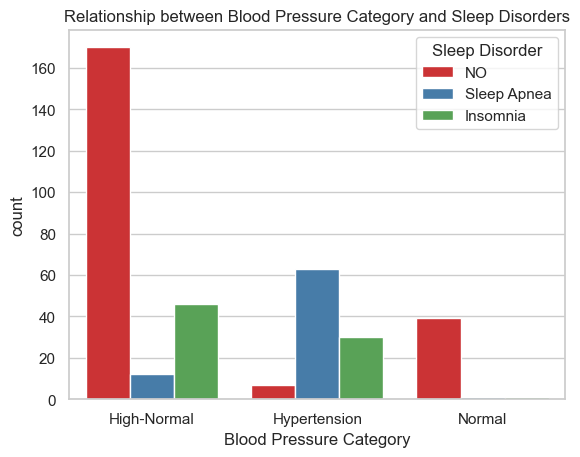

In [45]:
sb.countplot(x = 'Blood Pressure Category', hue = 'Sleep Disorder', data = sleep_data, palette = 'Set1').set_title('Relationship between Blood Pressure Category and Sleep Disorders')

Insights:
- Individuals with high-normal blood pressure have a small chance of suffering from sleep disorder but majority have none
- Individuals with hypertension are likely to suffer from sleep apnea, the chances of them having no sleep disorder is small
- Individuals with normal blood pressure does not suffer from any sleep disorders
- Based on these insights, there seems to be some correlation between blood pressure category and the presence of sleep disorders

### 3. Choosing Top 3 Predictors

Columns within the dataset:
- Gender
- Age
- Occupation
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- BMI Category
- Heart Rate
- Daily Steps
- Systolic Pressure
- Diastolic Pressure
- Blood Pressure Category

From the Explanatory Data Analysis conducted, we have identified 5 potential predictors:
1. Age
2. Sleep Duration
3. Occupation
4. Gender
5. BMI Category

*Note that systolic pressure and diastolic pressure are excluded from analysis as these values are specifically used to calculate and categorise individuals into blood pressure categories.*

To determine the top three predictors for machine learning in our analysis of sleep disorders, we will use a correlation matrix. This matrix helps us analyze the strength and direction of linear relationships between variables, allowing us to identify the most influential factors for predictive modeling

**Calculating Correlation**

In [46]:
temp_df = temp_df.drop(columns=['Blood Pressure'])
temp_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Engineer,6.1,6,42,6,Overweight,77,4200,0,126,83,High-Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80,High-Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80,High-Normal
3,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,1,140,90,Hypertension
4,Male,28,Salesperson,5.9,4,30,8,Obese,85,3000,1,140,90,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95,Hypertension
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,1,140,95,Hypertension
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95,Hypertension
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95,Hypertension


In [47]:
# Convert non-numeric data into numbers
LE = LabelEncoder()

categories = ['Gender','Occupation','BMI Category','Blood Pressure Category']
for label in categories:
    temp_df[label] = LE.fit_transform(temp_df[label])
temp_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,1,27,2,6.1,6,42,6,2,77,4200,0,126,83,0
1,1,28,1,6.2,6,60,8,0,75,10000,0,125,80,0
2,1,28,1,6.2,6,60,8,0,75,10000,0,125,80,0
3,1,28,5,5.9,4,30,8,1,85,3000,1,140,90,1
4,1,28,5,5.9,4,30,8,1,85,3000,1,140,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,4,8.1,9,75,3,2,68,7000,1,140,95,1
370,0,59,4,8.0,9,75,3,2,68,7000,1,140,95,1
371,0,59,4,8.1,9,75,3,2,68,7000,1,140,95,1
372,0,59,4,8.1,9,75,3,2,68,7000,1,140,95,1


<Axes: >

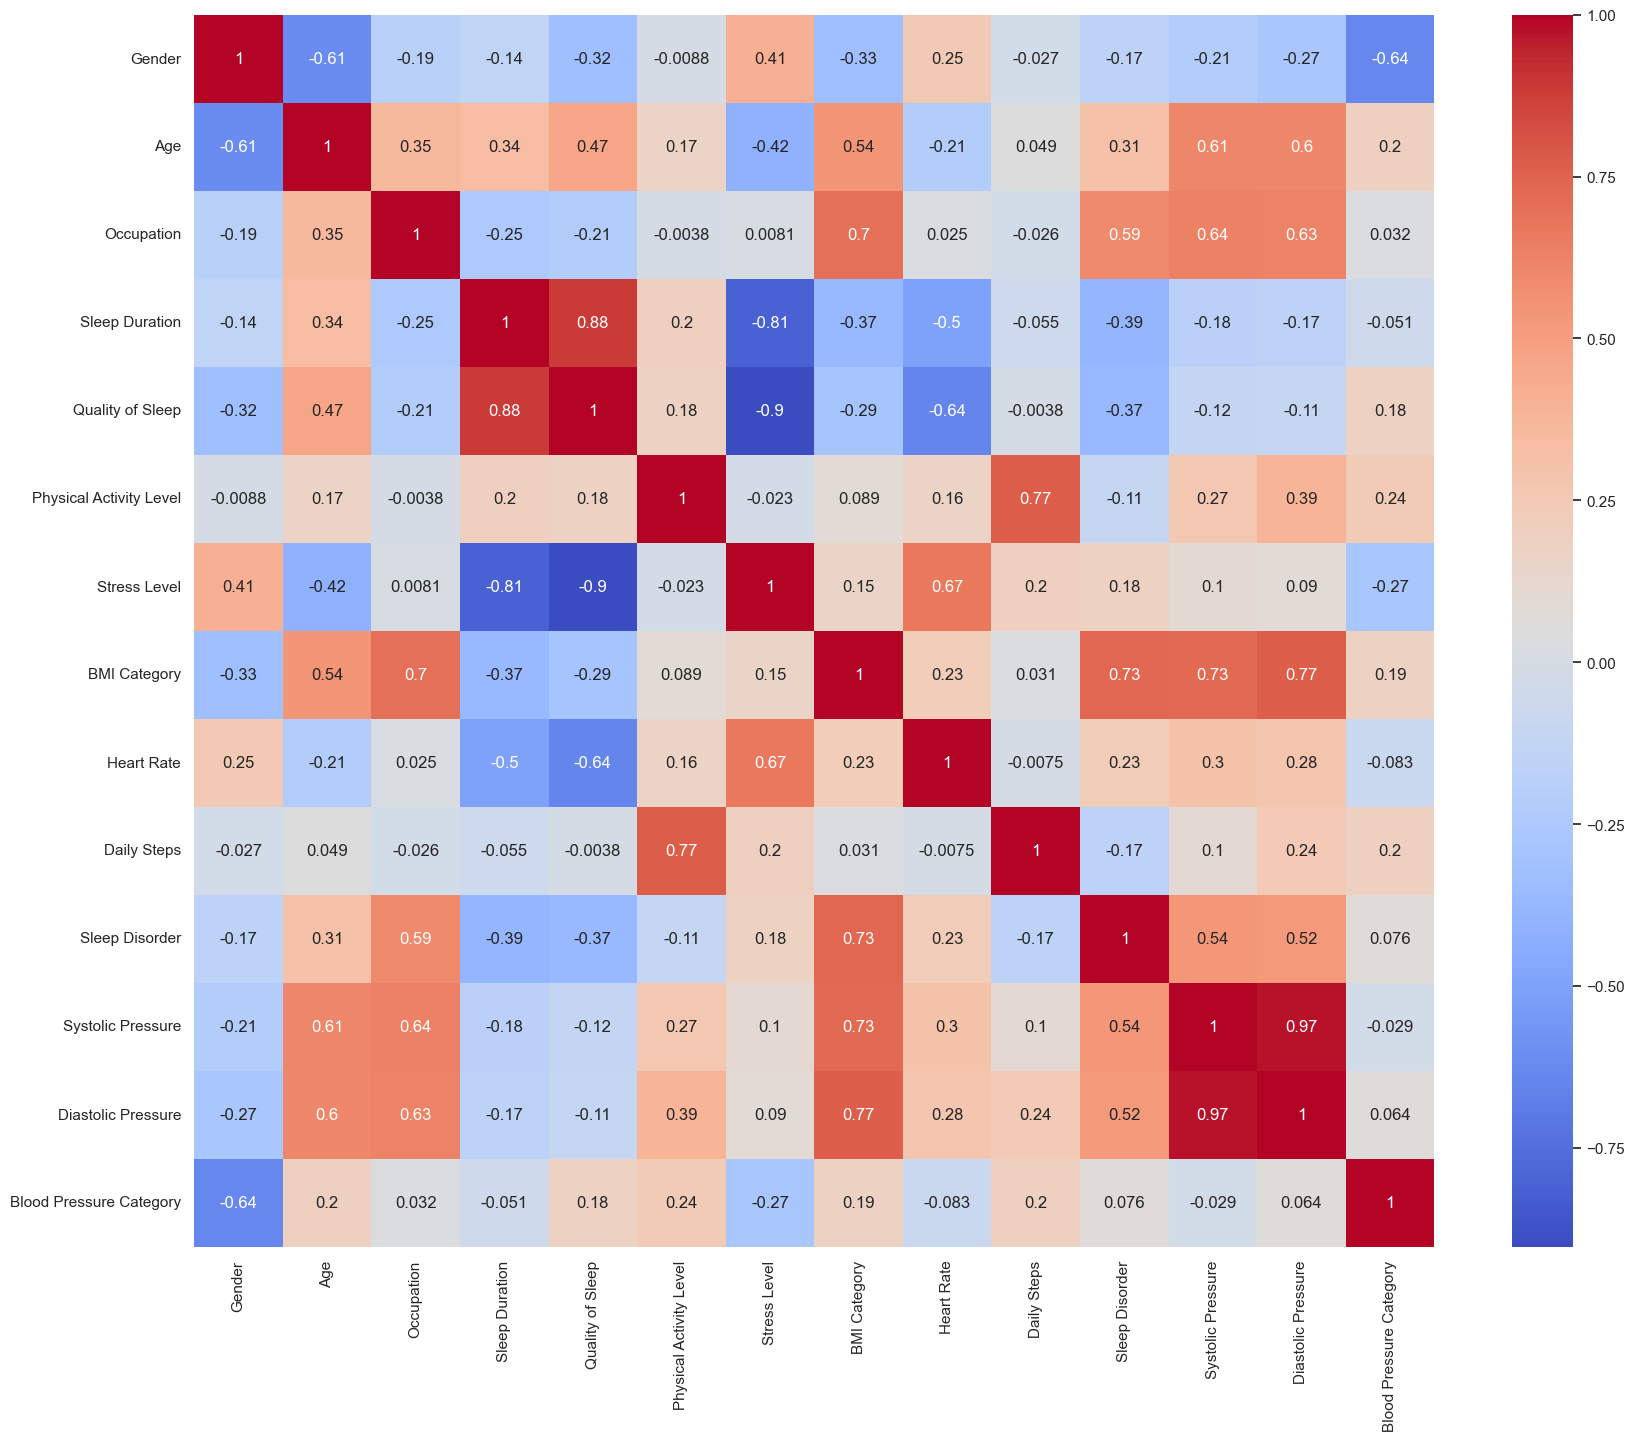

In [48]:
#Calculate correlation matrix
correlation_matrix = temp_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sb.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

Since our problem statement focuses on identifying variables that affect sleep disorders, we print the values out separately for a better view.

In [49]:
# Print the correlation of 'Sleep Disorder' with every other variable
sleep_disorder_correlation = correlation_matrix.loc['Sleep Disorder']
print(sleep_disorder_correlation)

Gender                    -0.166533
Age                        0.305225
Occupation                 0.593697
Sleep Duration            -0.388937
Quality of Sleep          -0.365612
Physical Activity Level   -0.109088
Stress Level               0.180255
BMI Category               0.734511
Heart Rate                 0.229302
Daily Steps               -0.165222
Sleep Disorder             1.000000
Systolic Pressure          0.539156
Diastolic Pressure         0.524053
Blood Pressure Category    0.075982
Name: Sleep Disorder, dtype: float64


From the correlation values above, **BMI category** has the highest correlation (0.734511). Ignoring systolic and diastolic pressure, the second highest correlation would be **Occupation** (0.593697). In our project, we decided to also consider negative correlation as it can capture important insights into factors that may influence sleep disorders in an opposite direction. It also allows us to take a comprehensive approach which ensures that we explore all possible relationships and select predictors that contribute meaningfully to our predictive model. With this decision, the third predictor would be **Sleep Duration**.

**Selected predictors:**
1. BMI Category
2. Occupation
3. Sleep Duration

The selection of predictors for predicting the presence of sleep disorders is an initial step in our analysis. These predictors are chosen based on their potential relevance and initial correlations with sleep disorders. However, it is important to note that our model evaluation process will guide us in refining and potentially changing these predictors.

As we evaluate our predictive model, we will assess the performance metrics, such as accuracy, precision, recall, and F1 score. This evaluation will help us understand how well our chosen predictors are at making accurate predictions on the presence of sleep disorders.

Furthermore, variables in our dataset may have relationships with each other, known as multicollinearity. During model evaluation, we will explore how variables interact and whether certain predictors contribute unique information or overlap with others. This exploration allows us to play around with different predictors, considering their individual contributions and potential correlations with other variables to optimize the predictive power of our model.

---
## Machine Learning <a name="RF1"></a>

We build four models with different set of predictors in this part.

For model 1,we try on the three predictors based on the result of EDA first.

Then after extracting the feature importance of each predictor, we found that although the 5 predictors potentially related to Sleep Disorders in our EDA are'Age,Sleep Duration,Occupation, Gender,BMI Category',the feature importance of 'Gender' is the lowest but 'Daily Steps' is much higher than expected.Based on the statement above as well as the feature importance, we come up with the following three combinations of predictors:

For model 2, we try on the three predictors with the highest feature importance.

For model 3,we use two predictors that have high correlation with 'Sleep Disorders',and one being 'Daily Steps'.

For model 4,we use two predictors that have highest feature importance and one being 'Gender'.

And for each model, we follow the same flow: create a model (depth=3,n_estimators=100) using RandomForest method first->using GridSearch method to tune the parameters (max_depth and n_estimators)->build a post-tuning model using RandomForest method

first, extract the feature importance of each predictor(Systolic Pressure and Diastolic Pressure are dropped from the dataframe because they are only used for evaluating the Blood Pressure Category in EDA)

In [50]:
temp_df.drop(columns=['Systolic Pressure'], inplace=True)
temp_df.drop(columns=['Diastolic Pressure'], inplace=True)
temp_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
0,1,27,2,6.1,6,42,6,2,77,4200,0,0
1,1,28,1,6.2,6,60,8,0,75,10000,0,0
2,1,28,1,6.2,6,60,8,0,75,10000,0,0
3,1,28,5,5.9,4,30,8,1,85,3000,1,1
4,1,28,5,5.9,4,30,8,1,85,3000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,4,8.1,9,75,3,2,68,7000,1,1
370,0,59,4,8.0,9,75,3,2,68,7000,1,1
371,0,59,4,8.1,9,75,3,2,68,7000,1,1
372,0,59,4,8.1,9,75,3,2,68,7000,1,1


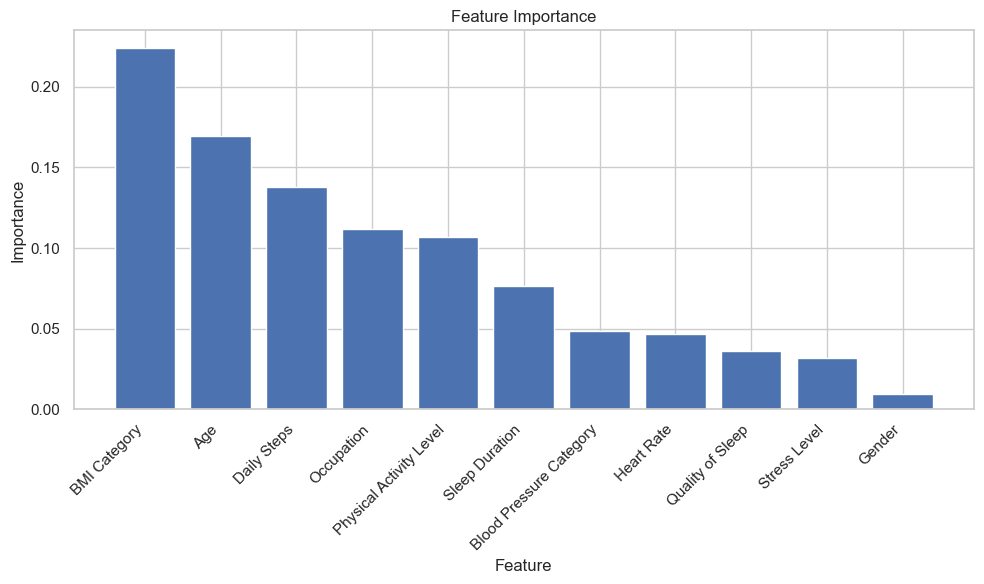

In [52]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.drop('Sleep Disorder',axis=1), temp_df['Sleep Disorder'], test_size=0.3, random_state=42)

# Assuming X is a DataFrame with columns
# Train RandomForestClassifier model
rf = RandomForestClassifier(class_weight='balanced', random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create DataFrame to store feature names and importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

We first build a model based on the result of EDA

MODEL 1

In [145]:
predict_data=temp_df[['BMI Category','Occupation','Sleep Duration','Sleep Disorder']]
predict_data

,BMI Category,Occupation,Sleep Duration,Sleep Disorder
0,2,2,6.1,0
1,0,1,6.2,0
2,0,1,6.2,0
3,1,5,5.9,1
4,1,5,5.9,1
...,...,...,...,...
369,2,4,8.1,1
370,2,4,8.0,1
371,2,4,8.1,1
372,2,4,8.1,1


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)

In [147]:
X_train1=X_train
y_train1=y_train

In [61]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Train Data
Accuracy  :	 0.9147286821705426



<Axes: >

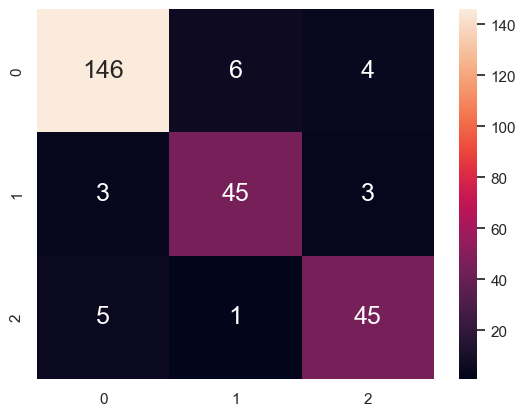

In [62]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rfc.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfc.score(X_train, y_train))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9009009009009009



<Axes: >

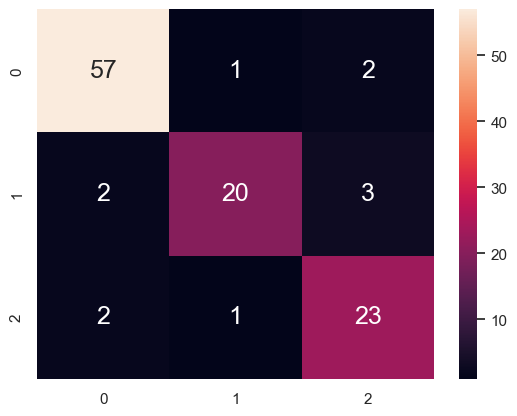

In [63]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rfc.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc.score(X_test, y_test))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid with multiple ranges for n_estimators
param_grid = {
    'n_estimators': range(100, 1001, 100),  # n_estimators from 100 to 1000 in steps of 100
    'max_depth': range(2,10)                # max_depth from 2 to 11
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best Score: 0.8953996983408746


Training accuracy:  0.9147286821705426


<Axes: >

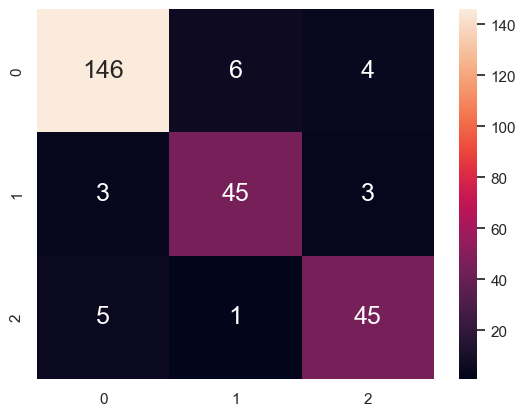

In [106]:
rfc_1 = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=42)
rfc_1.fit(X_train, y_train)
y_train_pred = rfc_1.predict(X_train)
print("Training accuracy: ",rfc_1.score(X_train,y_train))
#confusion matrix heatmap
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9099099099099099



<Axes: >

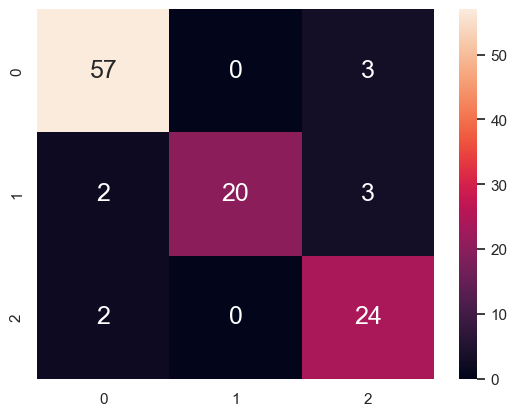

In [107]:
y_test_pred = rfc_1.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc_1.score(X_test, y_test))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

the test accuracy has a slight improvement

MODEL 2

In [164]:
predict_data=temp_df[['BMI Category','Age','Daily Steps','Sleep Disorder']]
predict_data

,BMI Category,Age,Daily Steps,Sleep Disorder
0,2,27,4200,0
1,0,28,10000,0
2,0,28,10000,0
3,1,28,3000,1
4,1,28,3000,1
...,...,...,...,...
369,2,59,7000,1
370,2,59,7000,1
371,2,59,7000,1
372,2,59,7000,1


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)

In [166]:
X_train2=X_train
y_train2=y_train

In [167]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
rfc2 = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Train Data
Accuracy  :	 0.9069767441860465



<Axes: >

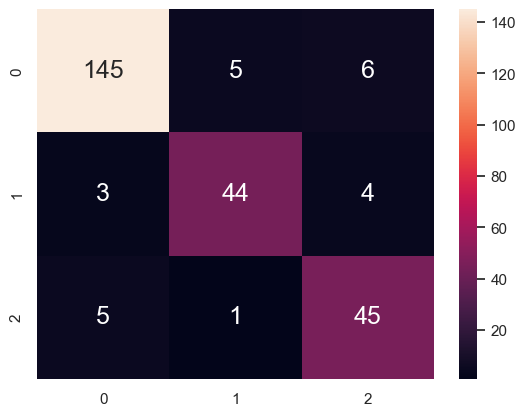

In [170]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rfc2.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfc2.score(X_train, y_train))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8918918918918919



<Axes: >

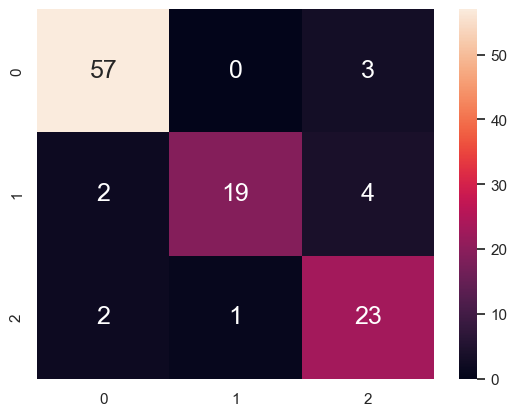

In [171]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rfc2.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc2.score(X_test, y_test))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [73]:
# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid with multiple ranges for n_estimators
param_grid = {
    'n_estimators': range(100, 1001, 100),  # n_estimators from 100 to 1000 in steps of 100
    'max_depth': range(2,10)                # max_depth from 2 to 11
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 2, 'n_estimators': 600}
Best Score: 0.88763197586727


Training accuracy:  0.8837209302325582


<Axes: >

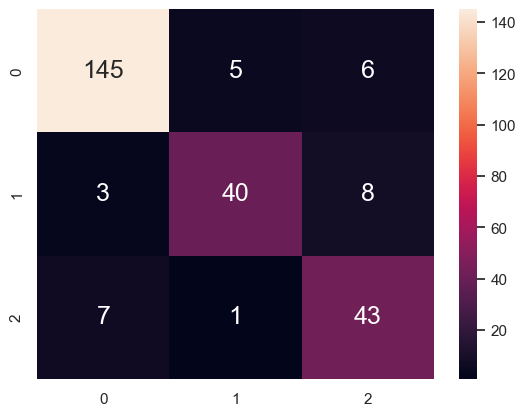

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)
rfc_2 = RandomForestClassifier(n_estimators=600,max_depth=2, random_state=42)
rfc_2.fit(X_train, y_train)
y_train_pred = rfc_2.predict(X_train)
print("Training accuracy: ",rfc_2.score(X_train,y_train))
#confusion matrix heatmap
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8828828828828829



<Axes: >

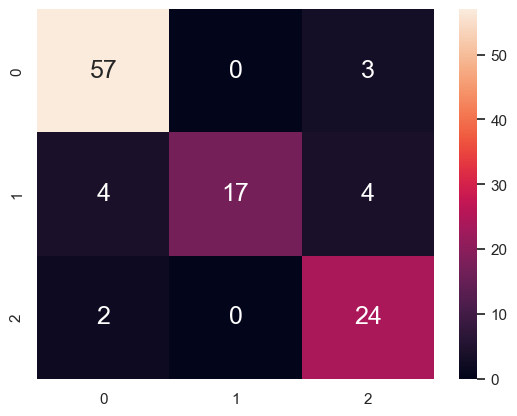

In [110]:
y_test_pred = rfc_2.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc_2.score(X_test, y_test))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

MODEL 3

In [151]:
predict_data=temp_df[['Daily Steps','Occupation','Sleep Duration','Sleep Disorder']]
predict_data

,Daily Steps,Occupation,Sleep Duration,Sleep Disorder
0,4200,2,6.1,0
1,10000,1,6.2,0
2,10000,1,6.2,0
3,3000,5,5.9,1
4,3000,5,5.9,1
...,...,...,...,...
369,7000,4,8.1,1
370,7000,4,8.0,1
371,7000,4,8.1,1
372,7000,4,8.1,1


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)

In [153]:
X_train3=X_train
y_train3=y_train

In [78]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
rfc3 = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)
rfc3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Train Data
Accuracy  :	 0.8875968992248062



<Axes: >

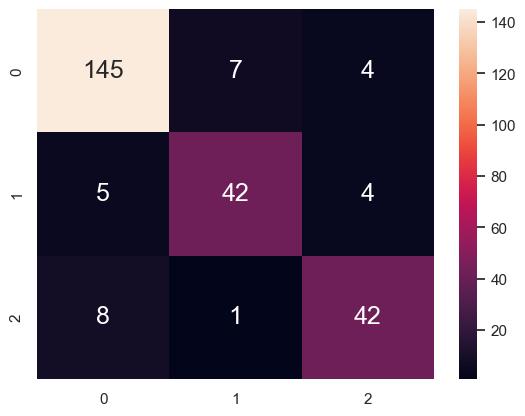

In [79]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rfc3.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfc3.score(X_train, y_train))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8828828828828829



<Axes: >

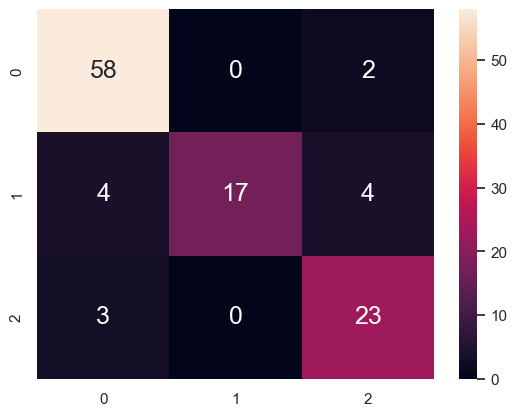

In [80]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rfc3.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc3.score(X_test, y_test))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [81]:
# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid with multiple ranges for n_estimators
param_grid = {
    'n_estimators': range(100, 1001, 100),  # n_estimators from 100 to 1000 in steps of 100
    'max_depth': range(2,10)                # max_depth from 2 to 11
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 7, 'n_estimators': 200}
Best Score: 0.8990950226244344


Training accuracy:  0.9302325581395349


<Axes: >

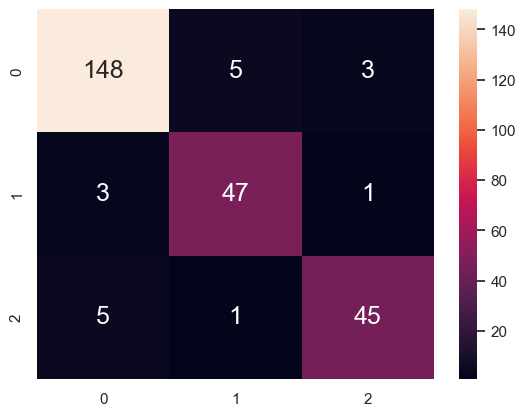

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)
rfc_3 = RandomForestClassifier(n_estimators=200,max_depth=7, random_state=42)
rfc_3.fit(X_train, y_train)
y_train_pred = rfc_3.predict(X_train)
print("Training accuracy: ",rfc_3.score(X_train,y_train))
#confusion matrix heatmap
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.918918918918919



<Axes: >

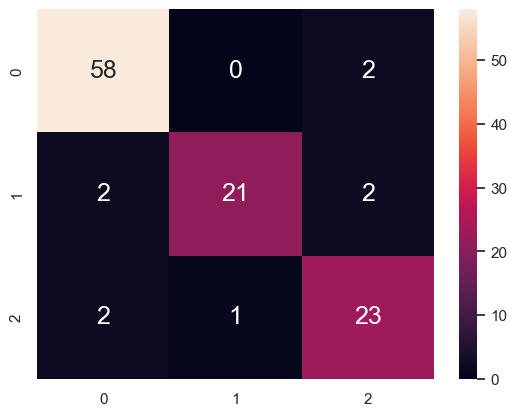

In [113]:
y_test_pred = rfc_3.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc_3.score(X_test, y_test))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

MODEL 4

In [154]:
predict_data=temp_df[['BMI Category','Age','Gender','Sleep Disorder']]
predict_data

,BMI Category,Age,Gender,Sleep Disorder
0,2,27,1,0
1,0,28,1,0
2,0,28,1,0
3,1,28,1,1
4,1,28,1,1
...,...,...,...,...
369,2,59,0,1
370,2,59,0,1
371,2,59,0,1
372,2,59,0,1


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predict_data.drop('Sleep Disorder',axis=1), predict_data['Sleep Disorder'], test_size=0.3, random_state=42)

In [156]:
X_train4=X_train
y_train4=y_train

In [141]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
rfc4 = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=42)
rfc4.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Train Data
Accuracy  :	 0.8798449612403101


<Axes: >

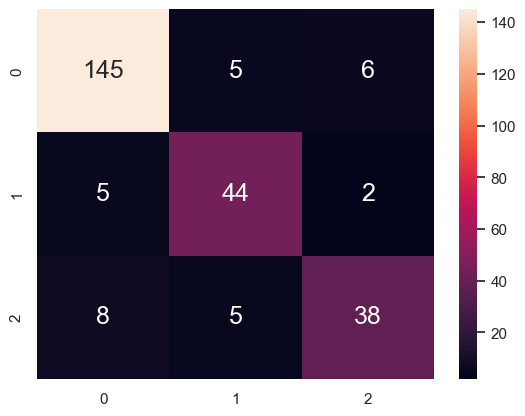

In [119]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rfc4.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfc4.score(X_train, y_train))




# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8648648648648649



<Axes: >

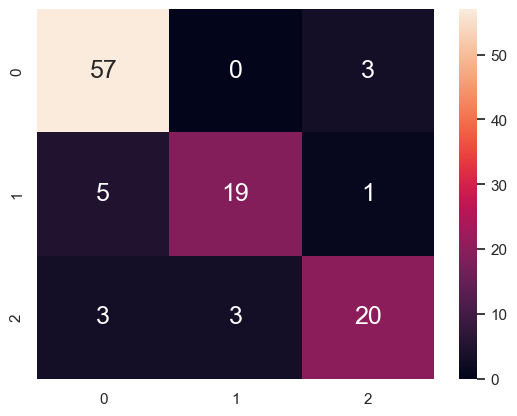

In [120]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rfc4.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc4.score(X_test, y_test))
print()



# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [121]:
# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid with multiple ranges for n_estimators
param_grid = {
    'n_estimators': range(100, 1001, 100),  # n_estimators from 100 to 1000 in steps of 100
    'max_depth': range(2,10)                # max_depth from 2 to 11
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 2, 'n_estimators': 200}
Best Score: 0.8760935143288083


Training accuracy:  0.875968992248062


<Axes: >

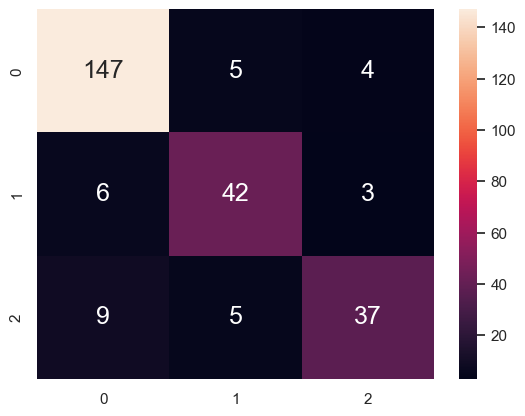

In [142]:
rfc_4 = RandomForestClassifier(n_estimators=200,max_depth=2, random_state=42)
rfc_4.fit(X_train, y_train)
y_train_pred = rfc_4.predict(X_train)
print("Training accuracy: ",rfc_4.score(X_train,y_train))
#confusion matrix heatmap
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8648648648648649



<Axes: >

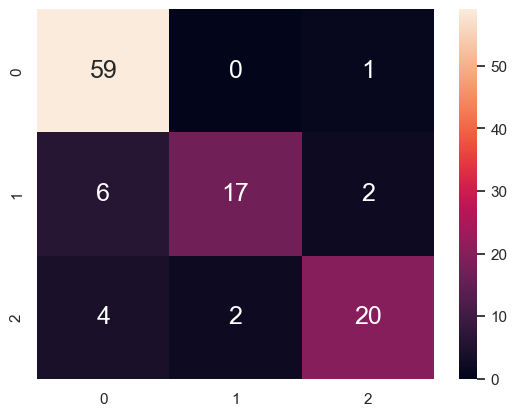

In [143]:
y_test_pred = rfc_4.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfc_4.score(X_test, y_test))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Cross Validation

Compute the cross-validation score of our final models

In [158]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc_1, X_train1, y_train1, cv=5)  # 5-fold cross-validation
print("Cross-validation scores for model 1:", scores)
print("Mean cross-validation score for model 1:", scores.mean())
print("\n")
scores2 = cross_val_score(rfc_2, X_train2, y_train2, cv=5)  # 5-fold cross-validation
print("Cross-validation scores for model 2:", scores2)
print("Mean cross-validation score for model 2:", scores2.mean())
print("\n")
scores3 = cross_val_score(rfc_3, X_train3, y_train3, cv=5)  # 5-fold cross-validation
print("Cross-validation scores for model 3:", scores3)
print("Mean cross-validation score for model 3:", scores3.mean())
print("\n")
scores4 = cross_val_score(rfc_4, X_train4, y_train4, cv=5)  # 5-fold cross-validation
print("Cross-validation scores for model 4:", scores4)
print("Mean cross-validation score for model 4:", scores4.mean())

Cross-validation scores for model 1: [0.86538462 0.90384615 0.90384615 0.92156863 0.88235294]
Mean cross-validation score for model 1: 0.8953996983408746


Cross-validation scores for model 2: [0.86538462 0.88461538 0.90384615 0.90196078 0.88235294]
Mean cross-validation score for model 2: 0.88763197586727


Cross-validation scores for model 3: [0.92307692 0.90384615 0.90384615 0.90196078 0.8627451 ]
Mean cross-validation score for model 3: 0.8990950226244344


Cross-validation scores for model 4: [0.84615385 0.86538462 0.88461538 0.90196078 0.88235294]
Mean cross-validation score for model 4: 0.8760935143288083


model 1: BMI Category,Occupation,Sleep Duration 

model 2: BMI,Age,Daily Steps

model 3: Daily Steps,Occupation,Sleep Duration

model 4: BMI Category,Age,Gender

The analysis of both cross-validation results and test accuracy post-tuning reveals distinct performance tiers among the models. Model 4 emerges as the weakest performer, while Model 3 stands out as the clear frontrunner, showcasing the highest level of effectiveness. Meanwhile, Model 1 also demonstrates strong performance, closely trailing behind Model 3. Model 2, although falling short of the top contenders, maintains a moderate level of accuracy, hovering around the range of 0.88 to 0.89.

# Conclusion(Suggestion)

Based on our analysis of the models, we recommend increasing daily exercise and prioritizing sufficient sleep duration.